In [145]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [146]:
a = -2
b = 2
N = 1001
L = 1
Vo = 20

In [147]:
def Vpot(x):
    return x**2

In [148]:
def Vpot_FW(x):
        """
        Potential function in the finite square well. Width is L and value is global variable Vo
        """
        if abs(x) > L:
            return Vo
        else:
            return 0

In [149]:
x = np.linspace(a,b,N)
h=np.abs(x[0]-x[1])

In [157]:
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
T = -T/(2*(h**2))

In [158]:
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot_FW(x[i+1])
        else:
            V[i,j]=0


In [159]:
H = T + V
print(T)
print(V)
print(H)

[[ 62500. -31250.     -0. ...     -0.     -0.     -0.]
 [-31250.  62500. -31250. ...     -0.     -0.     -0.]
 [    -0. -31250.  62500. ...     -0.     -0.     -0.]
 ...
 [    -0.     -0.     -0. ...  62500. -31250.     -0.]
 [    -0.     -0.     -0. ... -31250.  62500. -31250.]
 [    -0.     -0.     -0. ...     -0. -31250.  62500.]]
[[20.  0.  0. ...  0.  0.  0.]
 [ 0. 20.  0. ...  0.  0.  0.]
 [ 0.  0. 20. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 20.  0.  0.]
 [ 0.  0.  0. ...  0. 20.  0.]
 [ 0.  0.  0. ...  0.  0. 20.]]
[[ 62520. -31250.      0. ...      0.      0.      0.]
 [-31250.  62520. -31250. ...      0.      0.      0.]
 [     0. -31250.  62520. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...  62520. -31250.      0.]
 [     0.      0.      0. ... -31250.  62520. -31250.]
 [     0.      0.      0. ...      0. -31250.  62520.]]


In [160]:
val,vec=np.linalg.eig(H)

In [161]:
z = np.argsort(val)
z = z[0:4]
energies=(val[z])
print(energies)

[ 0.91469943  3.63373668  8.06526627 13.96188648]


In [164]:
wavefunctions = np.zeros((len(val), num_eigs))
for i in range(len(z)):
    wavefunctions[:,i] = vec[:,z[i]]
zero_vec = np.zeros(4)
wavefunctions = np.vstack((zero_vec,wavefunctions,zero_vec))


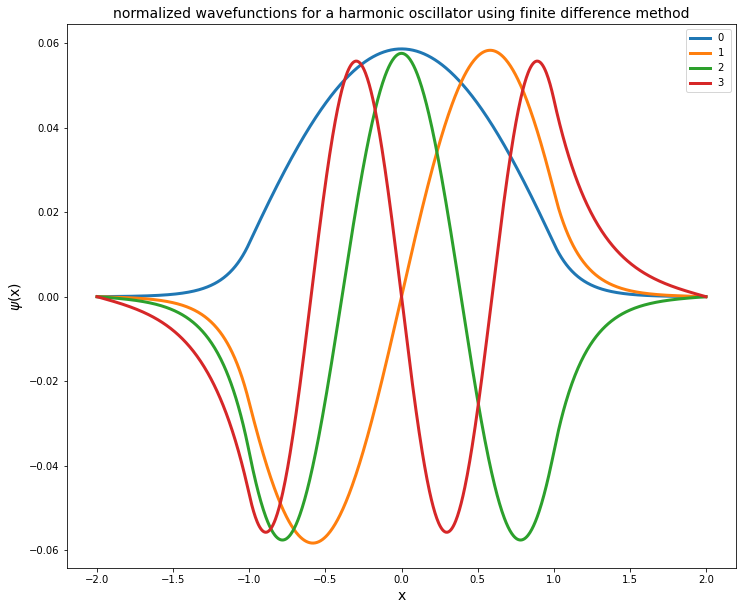

In [165]:
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
plt.show()